In [ ]:


import pandas as pd

# Replace 'your_dataset.csv' with the actual file path or URL of your dataset.
df = pd.read_csv('alzheimers_disease_data.csv')

# Display the first few rows of the dataset to verify it's loaded correctly.
print(df.head())


   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

In [ ]:


# Check for missing values
print(df.isnull().sum())

# Handle missing values (replace with mean, median, or remove rows/columns)
# Example: Fill missing values in 'column_name' with the mean
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Check data types
print(df.dtypes)

# Convert data types if necessary
# Example: Convert 'column_name' to numeric
# df['column_name'] = pd.to_numeric(df['column_name'])

# Explore descriptive statistics
print(df.describe())

# Identify outliers (using boxplots or other methods)
# Example: Use boxplot to visualize outliers in 'column_name'
# import matplotlib.pyplot as plt
# plt.boxplot(df['column_name'])
# plt.show()

# Handle outliers (remove or transform)
# Example: Remove rows where 'column_name' is greater than a certain value
# df = df[df['column_name'] < threshold_value]

# Feature scaling (if needed for machine learning)
# Example: Standardize or normalize numerical features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[['numerical_feature_1', 'numerical_feature_2']] = scaler.fit_transform(df[['numerical_feature_1', 'numerical_feature_2']])

# Encoding categorical variables (if needed for machine learning)
# Example: One-hot encode categorical features
# df = pd.get_dummies(df, columns=['categorical_feature'])

# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicate rows (if necessary)
# df.drop_duplicates(inplace=True)


PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

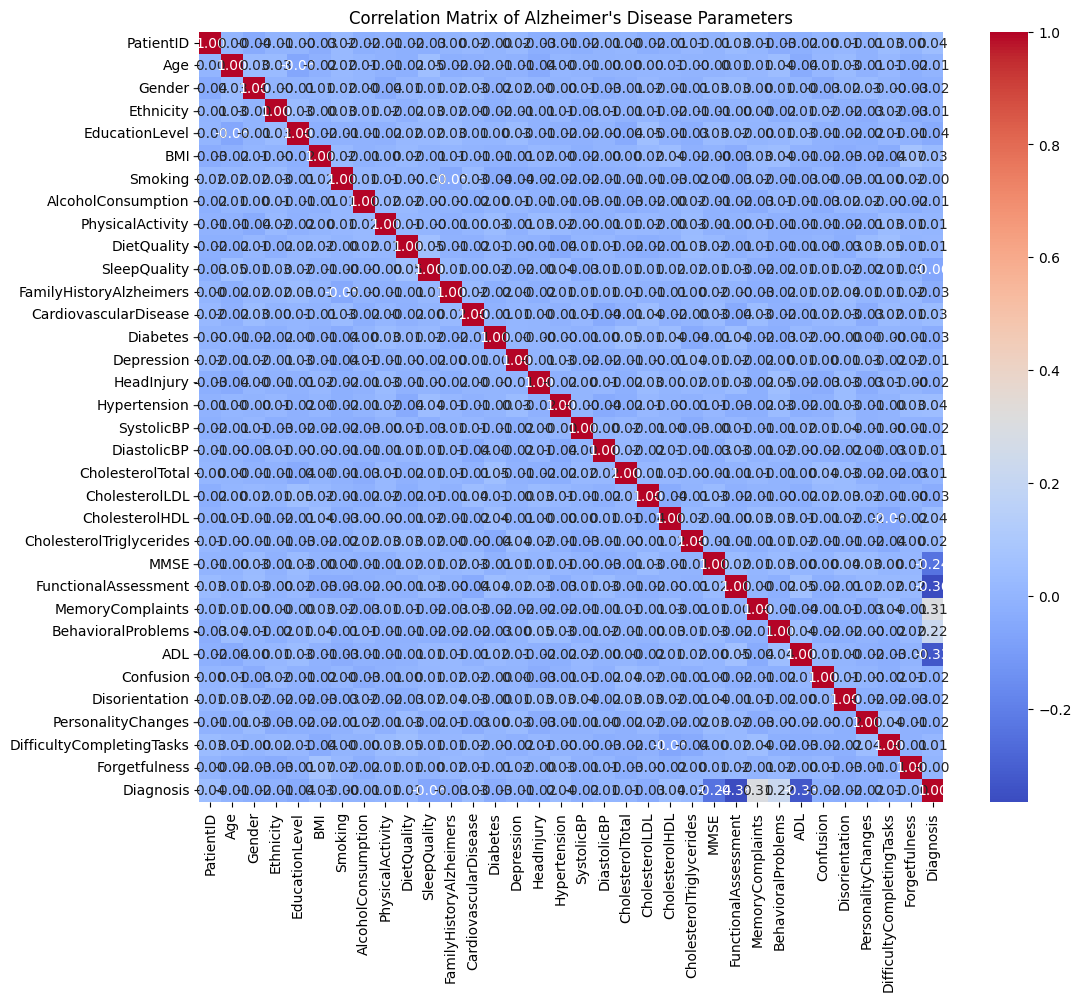

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the correlation matrix, selecting only numeric columns
# This line is modified to select only numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Alzheimer\'s Disease Parameters')
plt.show()

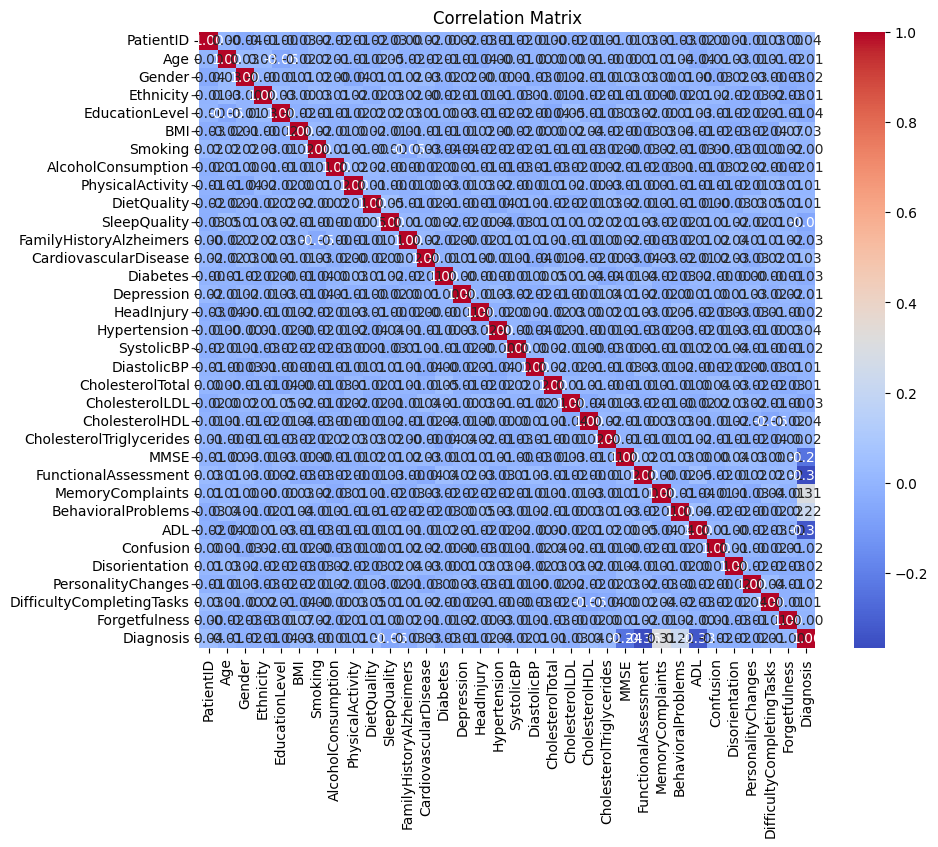

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame creation for demonstration (you can replace it with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Uncomment this line to read your actual data

# Check if 'CDR' exists in the DataFrame
if 'CDR' in df.columns:
    # Attempt to convert 'CDR' to numeric, handling errors if conversion fails
    try:
        df['CDR'] = pd.to_numeric(df['CDR'])
    except (ValueError, pd.errors.IntCastingNaNError):
        print("Warning: 'CDR' column contains non-numeric values. Please handle them appropriately.")
        # Exclude 'CDR' from correlation if it cannot be converted to numeric:
        correlation_matrix = df.select_dtypes(include=['number']).drop(columns=['CDR'], errors='ignore').corr()
    else:
        # If 'CDR' is numeric or successfully converted, include it in correlation
        correlation_matrix = df.select_dtypes(include=['number']).corr()
else:
    print("Warning: 'CDR' column does not exist in the DataFrame.")
    # Calculate the correlation matrix without 'CDR'
    correlation_matrix = df.select_dtypes(include=['number']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Assuming 'Diagnosis' is the target column for Alzheimer's disease prediction
target_column = 'Diagnosis'

# Print the available columns in the DataFrame
print("Available columns in the DataFrame:", df.columns)

# Separate features (X) and target (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=[np.number]).columns
categorical_columns = X.select_dtypes(exclude=[np.number]).columns

# Handle missing values
# Fill missing values in numerical columns with the mean
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].mean())

# Fill missing values in categorical columns with the most frequent value
X[categorical_columns] = X[categorical_columns].fillna(X[categorical_columns].mode().iloc[0])

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, columns=categorical_columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN (assuming 1D convolutional layers)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


Available columns in the DataFrame: Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6369 - loss: 0.6468 - val_accuracy: 0.7488 - val_loss: 0.5640
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7342 - loss: 0.5334 - val_accuracy: 0.7884 - val_loss: 0.4527
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8226 - loss: 0.4211 - val_accuracy: 0.7698 - val_loss: 0.4573
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8445 - loss: 0.3836 - val_accuracy: 0.8581 - val_loss: 0.3758
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8781 - loss: 0.3295 - val_accuracy: 0.8256 - val_loss: 0.3851
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8813 - loss: 0.2954 - val_accuracy: 0.8674 - val_loss: 0.3310
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9110 - loss: 0.2489 - val_accuracy: 0.8558 - val_loss: 0.3558
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9097 - loss: 0.2539 - val_accuracy: 0.8744 - val

In [ ]:


from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

# You can also visualize the report using seaborn or other plotting libraries if desired.
# For example:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       277
           1       0.84      0.82      0.83       153

    accuracy                           0.88       430
   macro avg       0.87      0.87      0.87       430
weighted avg       0.88      0.88      0.88       430



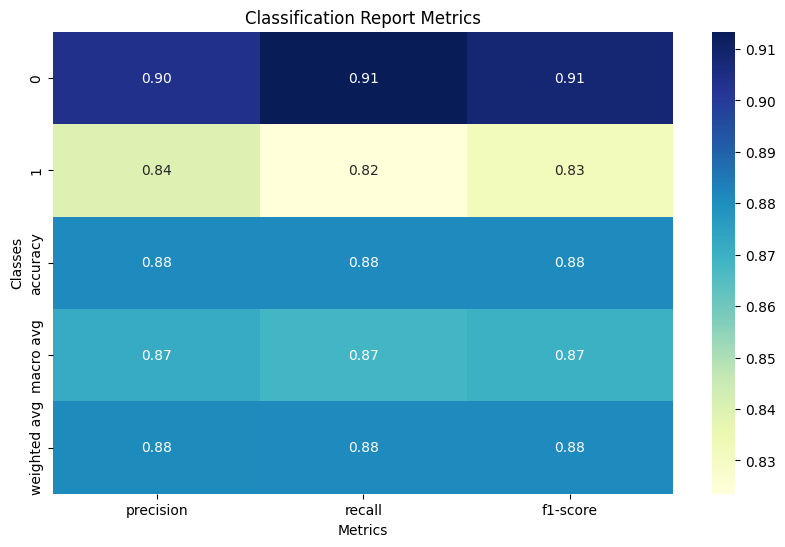

In [ ]:


from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already calculated y_pred and y_test
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a pandas DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot the precision, recall, and f1-score
plt.figure(figsize=(10, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


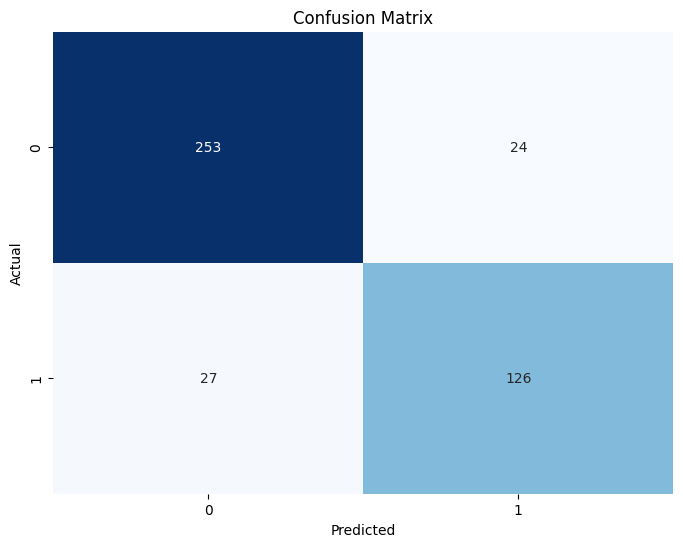

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated y_pred and y_test
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.8255813953488372
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.78      0.71      0.74       153

    accuracy                           0.83       430
   macro avg       0.81      0.80      0.81       430
weighted avg       0.82      0.83      0.82       430

Confusion Matrix:
 [[246  31]
 [ 44 109]]


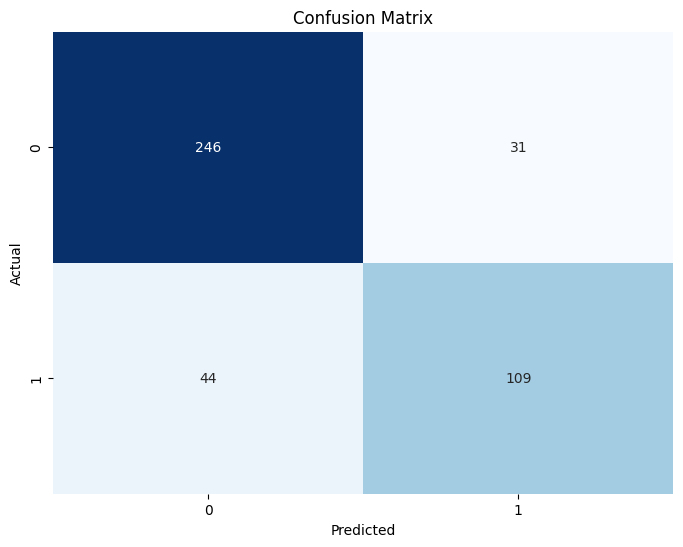

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already prepared your data (X_train, X_test, y_train, y_test)

# Reshape X_train and X_test to be 2D (samples × features) for Logistic Regression
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the model
model.fit(X_train_reshaped, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


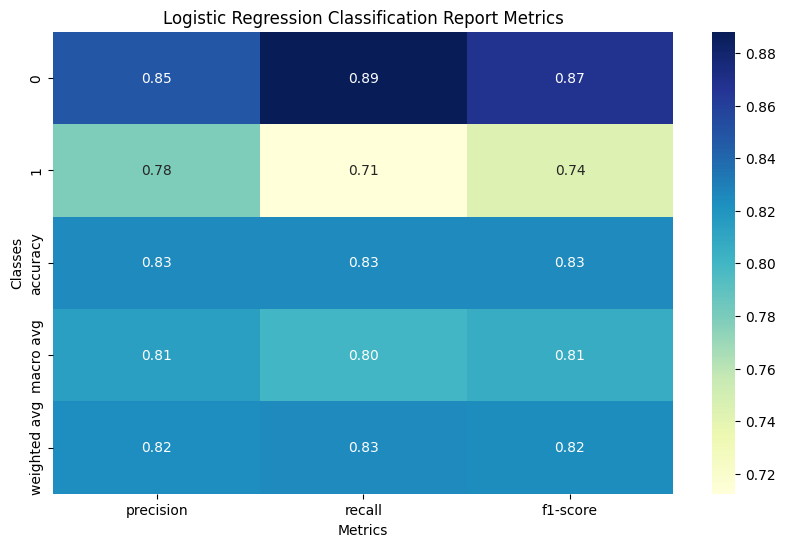

In [ ]:


# Assuming you have already calculated y_pred and y_test for your Logistic Regression model
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a pandas DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot the precision, recall, and f1-score
plt.figure(figsize=(10, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Logistic Regression Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


Accuracy: 0.9279069767441861
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       277
           1       0.96      0.83      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430

Confusion Matrix:
 [[272   5]
 [ 26 127]]


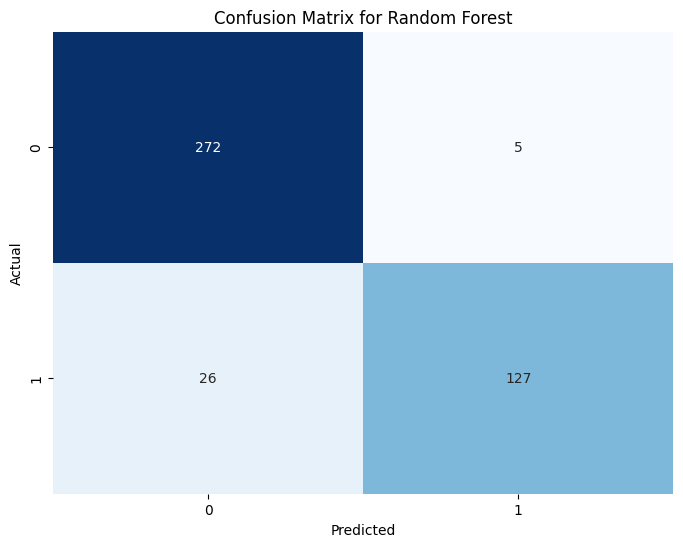

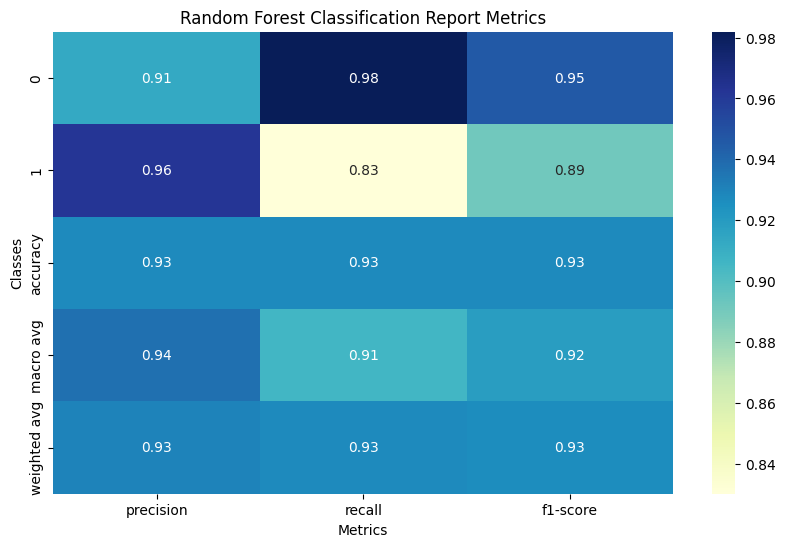

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already prepared your data (X_train, X_test, y_train, y_test)

# Reshape X_train and X_test to be 2D (samples × features) for Random Forest
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Create a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model
model.fit(X_train_reshaped, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Plot classification report metrics
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Random Forest Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


Accuracy: 0.958139534883721
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       277
           1       0.95      0.93      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430

Confusion Matrix:
 [[269   8]
 [ 10 143]]


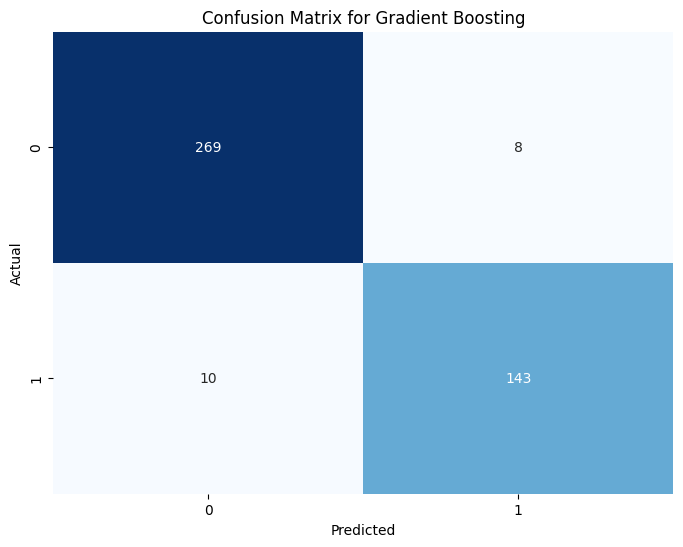

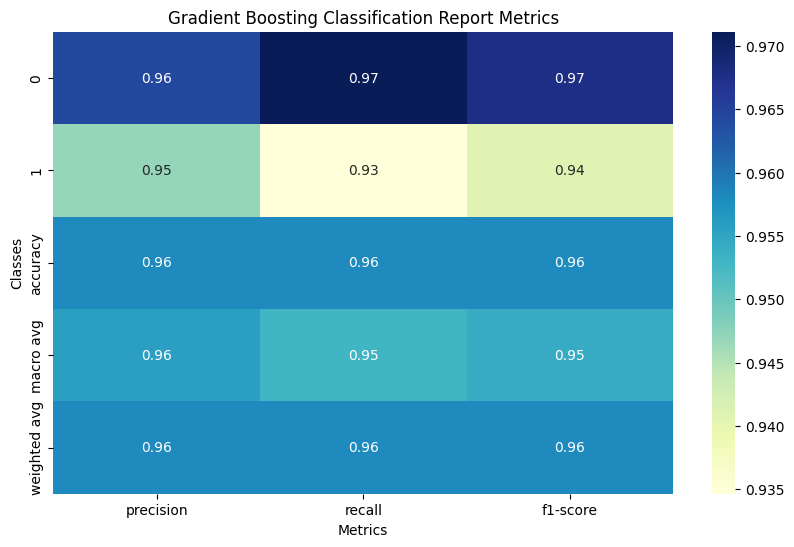

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already prepared your data (X_train, X_test, y_train, y_test)

# Reshape X_train and X_test to be 2D (samples × features) for Gradient Boosting
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Create a Gradient Boosting Classifier model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model
model.fit(X_train_reshaped, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

# Plot classification report metrics
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Gradient Boosting Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.6171 - loss: 0.6699 - val_accuracy: 0.6442 - val_loss: 0.6437
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6463 - loss: 0.6443 - val_accuracy: 0.6419 - val_loss: 0.6392
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6580 - loss: 0.6397 - val_accuracy: 0.6744 - val_loss: 0.6345
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6637 - loss: 0.6333 - val_accuracy: 0.6581 - val_loss: 0.6258
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6805 - loss: 0.6172 - val_accuracy: 0.6674 - val_loss: 0.6244
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6846 - loss: 0.6073 - val_accuracy: 0.6558 - val_loss: 0.6030
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7015 - loss: 0.5814 - val_accuracy: 0.6860 - val_loss: 0.5965
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6952 - loss: 0.5754 - val_accuracy: 0.6744 - v

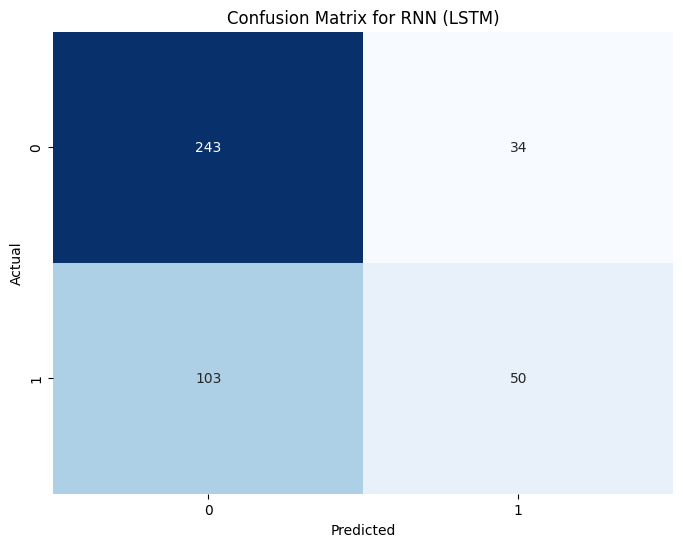

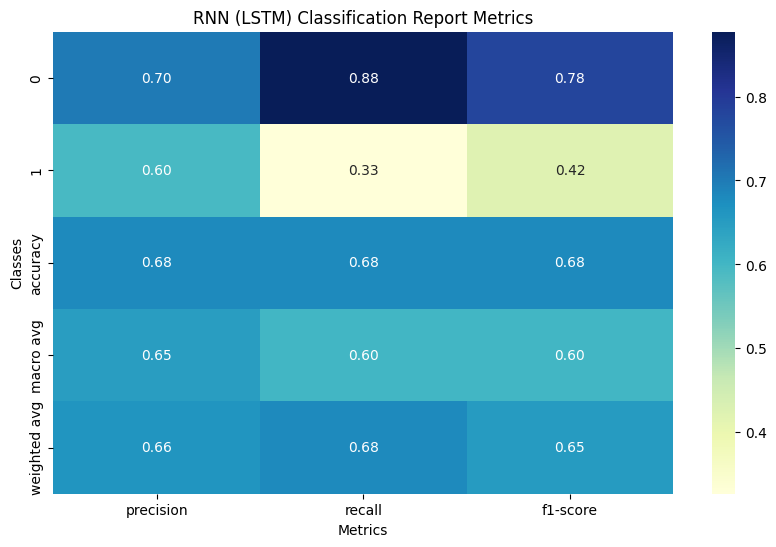

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already prepared your data (X_train, X_test, y_train, y_test)

# Reshape data for RNN (assuming LSTM layers)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the RNN model (using LSTM)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RNN (LSTM)')
plt.show()

# Plot classification report metrics
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('RNN (LSTM) Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


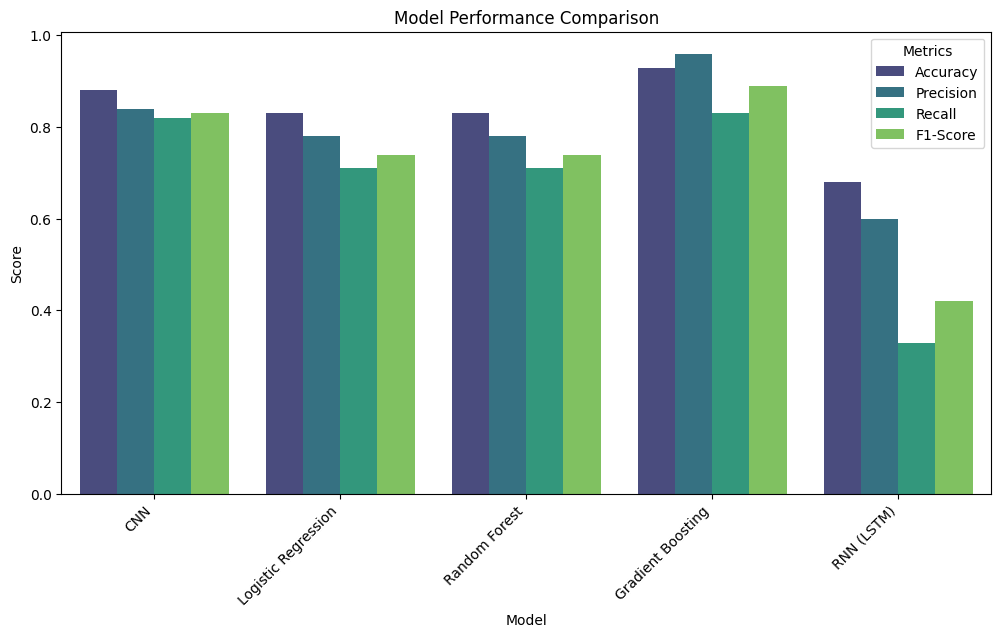

<ipython-input-18-a86788adf7ea>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
<ipython-input-18-a86788adf7ea>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=df, palette='viridis')
<ipython-input-18-a86788adf7ea>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=df, palette='viridis')
<ipython-input-18-a86788adf7ea>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

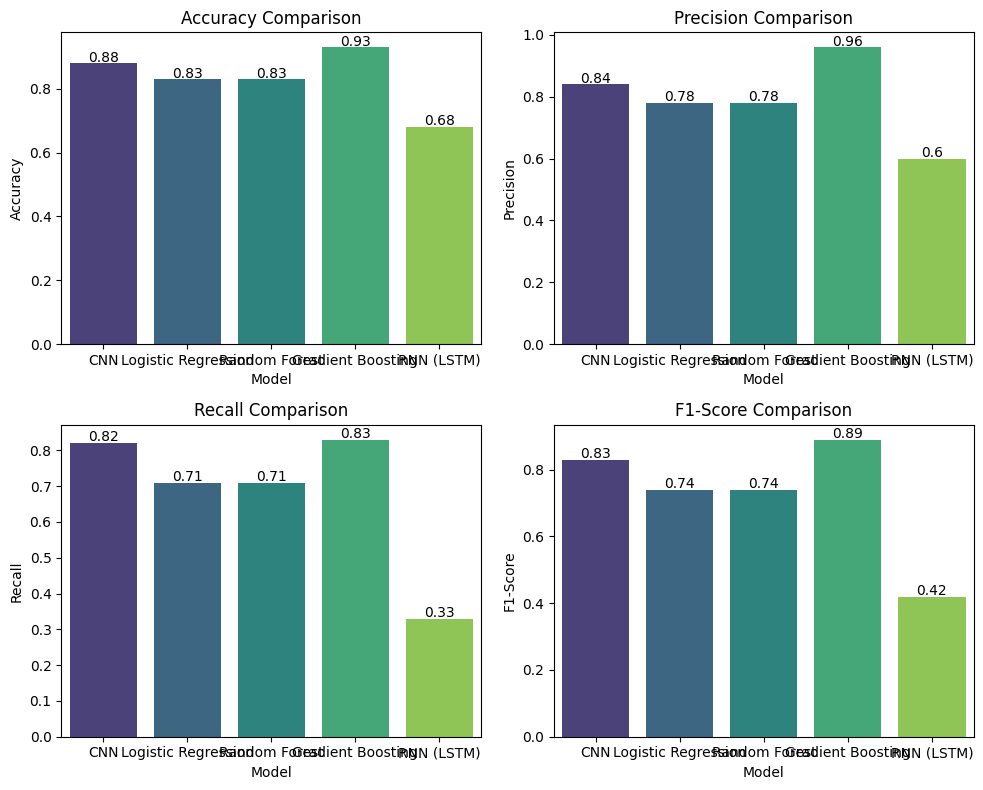

Model Accuracy:
CNN: 0.88
Logistic Regression: 0.83
Random Forest: 0.83
Gradient Boosting: 0.93
RNN (LSTM): 0.68


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Sample data (replace with your actual evaluation metrics)
models = ['CNN', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'RNN (LSTM)']
accuracy = [0.88, 0.83, 0.83, 0.93, 0.68]  # Example accuracy values (replace with your actual values)
precision = [0.84, 0.78, 0.78, 0.96, 0.60]
recall = [0.82, 0.71, 0.71, 0.83, 0.33]
f1_score = [0.83, 0.74, 0.74, 0.89, 0.42]


# Create a DataFrame for easier plotting
data = {
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
}

df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with seaborn
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')


# Plot the comparison using a bar plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metrics')
plt.xticks(rotation=45, ha='right')
plt.show()


# Individual plots for each metric
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
for i, v in enumerate(df['Accuracy']):
  plt.text(i, v + 0.005, str(round(v, 2)), ha='center')


plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df, palette='viridis')
plt.title('Precision Comparison')
plt.ylabel('Precision')
for i, v in enumerate(df['Precision']):
  plt.text(i, v + 0.005, str(round(v, 2)), ha='center')

plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df, palette='viridis')
plt.title('Recall Comparison')
plt.ylabel('Recall')
for i, v in enumerate(df['Recall']):
  plt.text(i, v + 0.005, str(round(v, 2)), ha='center')

plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1-Score', data=df, palette='viridis')
plt.title('F1-Score Comparison')
plt.ylabel('F1-Score')
for i, v in enumerate(df['F1-Score']):
  plt.text(i, v + 0.005, str(round(v, 2)), ha='center')

plt.tight_layout()
plt.show()

# Print the actual accuracy data
print("Model Accuracy:")
for model, accuracy_score in zip(models, accuracy):
  print(f"{model}: {accuracy_score:.2f}")